## Problem statement
### Predict the price of seattle Airbnb with the help of listing mentioned in the data set.

## Data
### Data was assigned by ejam inc.

## Evalution
     host_is_superhost                             
     host_identity_verified           
     accommodates                    
     neighbourhood_group_cleansed   
     property_type                  
     room_type                     
     latitude                      
     longitude                     
     guests_included               
     bathrooms                     
     bedrooms                      
     beds                          
     bed_type                      
     amenities                     
     cleaning_fee        
     price      

In [3]:
#import dependancies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Lets import the training and testing data for price**

In [4]:
dataset = pd.read_csv('price_train.csv')
dataset_1=pd.read_csv('price_test.csv')
# dataset=dataset.drop(['host_is_superhost','id','X1','host_response_rate','host_listings_count','host_response_time','host_identity_verified','latitude','longitude','cancellation_policy'],axis=1)
# dataset_1=dataset_1.drop(['host_is_superhost','id','X1','host_response_rate','host_listings_count','host_response_time','host_identity_verified','latitude','longitude','cancellation_policy'],axis=1)
# data
# X = dataset.iloc[:, 1:-1].values
# y = dataset.iloc[:, -1].values

In [5]:
dataset.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,...,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,...,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,...,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,776,3946674,True,90%,within a few hours,1,True,2,Central Area,House,...,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,...,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00


In [6]:
dataset_1.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,130,392779,False,90%,within an hour,1,True,4,Beacon Hill,Guest suite,...,1.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$85.00,3,300,True,moderate
1,2425,12456183,True,86%,within a day,1,False,4,Lake City,Guest suite,...,1.0,1,2,Real Bed,"{TV,Wifi,""Free parking on premises"",""Pets allo...",$40.00,2,1125,True,moderate
2,432,1851863,True,100%,within an hour,1,True,2,Northgate,Apartment,...,1.0,1,1,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",$150.00,5,120,False,strict_14_with_grace_period
3,5994,23309878,True,100%,within an hour,2,True,2,Downtown,Apartment,...,1.0,1,1,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$75.00,1,30,False,strict_14_with_grace_period
4,2110,10768347,False,100%,within an hour,1,False,2,Other neighborhoods,House,...,1.0,1,1,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,1,3,False,flexible


**As we can see, There are some features which are irrelevant hence dropping the unnneccary features**

In [7]:
dataset=dataset.drop(['host_is_superhost','id','X1','host_response_rate','host_listings_count','host_response_time','host_identity_verified','latitude','longitude','cancellation_policy'],axis=1)
dataset_1=dataset_1.drop(['host_is_superhost','id','X1','host_response_rate','host_listings_count','host_response_time','host_identity_verified','latitude','longitude','cancellation_policy'],axis=1)

In [8]:
dataset.head()

,accommodates,neighbourhood_group_cleansed,property_type,room_type,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,price
0,5,Downtown,Apartment,Entire home/apt,4,2.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,$279.00
1,2,Queen Anne,House,Entire home/apt,1,1.0,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,$99.00
2,4,Rainier Valley,Guest suite,Entire home/apt,2,1.0,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,$75.00
3,2,Central Area,House,Private room,1,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,$70.00
4,8,Beacon Hill,House,Entire home/apt,6,2.5,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,$242.00


In [9]:
dataset_1.head()

,accommodates,neighbourhood_group_cleansed,property_type,room_type,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable
0,4,Beacon Hill,Guest suite,Entire home/apt,2,1.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$85.00,3,300,True
1,4,Lake City,Guest suite,Entire home/apt,1,1.0,1,2,Real Bed,"{TV,Wifi,""Free parking on premises"",""Pets allo...",$40.00,2,1125,True
2,2,Northgate,Apartment,Entire home/apt,1,1.0,1,1,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",$150.00,5,120,False
3,2,Downtown,Apartment,Entire home/apt,1,1.0,1,1,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$75.00,1,30,False
4,2,Other neighborhoods,House,Private room,1,1.0,1,1,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,1,3,False


In [10]:
dataset_1.isnull().sum()

accommodates                    0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
guests_included                 0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
cleaning_fee                    0
minimum_nights                  0
maximum_nights                  0
instant_bookable                0
dtype: int64

In [11]:
# #applying it on the testing set
# dataset_1['cleaning_fee'] = dataset_1['cleaning_fee'].str.replace('$', '')
# dataset_1['bathrooms'] = dataset_1['bathrooms'].astype(int)
# dataset_1['cleaning_fee']=dataset_1['cleaning_fee'].astype(float)
# dataset_1['cleaning_fee'] = dataset_1['cleaning_fee'].astype(int)


**We can see there are $ sign in the price and price column hence let us remove that sign.** 

In [12]:
dataset['price'] = dataset['price'].str.replace('$', '')
dataset['price'] = dataset['price'].str.replace(',', '')
dataset['cleaning_fee'] = dataset['cleaning_fee'].str.replace('$', '')
dataset['bathrooms'] = dataset['bathrooms'].astype(int)
dataset['price']=dataset['price'].astype(float)
dataset['cleaning_fee']=dataset['cleaning_fee'].astype(float)
dataset['cleaning_fee'] = dataset['cleaning_fee'].astype(int)

In [13]:
dataset.head()

,accommodates,neighbourhood_group_cleansed,property_type,room_type,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,price
0,5,Downtown,Apartment,Entire home/apt,4,2,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",129,2,1125,True,279.0
1,2,Queen Anne,House,Entire home/apt,1,1,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",50,2,30,True,99.0
2,4,Rainier Valley,Guest suite,Entire home/apt,2,1,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",25,2,28,False,75.0
3,2,Central Area,House,Private room,1,1,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",0,2,30,False,70.0
4,8,Beacon Hill,House,Entire home/apt,6,2,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",99,2,12,False,242.0


**As we can see that our price is in appropriate formate, so let us just do some EDA.**

## EDA

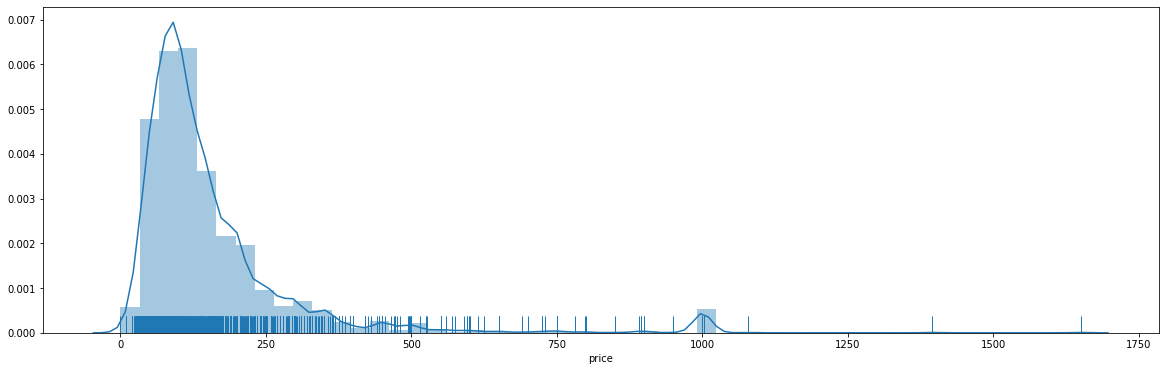

In [26]:
plt.figure(figsize = (20,6))
sns.distplot(dataset["price"],rug = True);

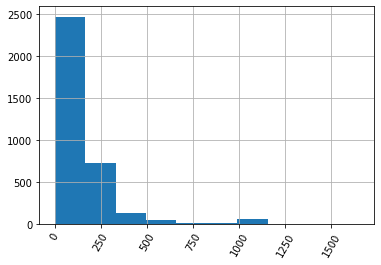

In [28]:
## See the distribution of price
import seaborn as sns
hist_price=dataset["price"].hist()

plt.xticks(rotation=60);
#we can observe that the price seems to be <500 for so many obeservations

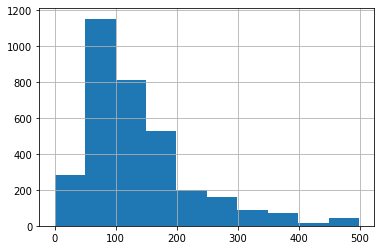

In [29]:
hist_price2=dataset["price"][dataset["price"]<500].hist()

In [30]:
dataset['neighbourhood_group_cleansed'].value_counts()

Downtown               652
Other neighborhoods    631
Capitol Hill           393
Central Area           292
Queen Anne             241
Ballard                190
West Seattle           182
Rainier Valley         156
Cascade                144
Beacon Hill            141
University District     98
Delridge                95
Northgate               81
Magnolia                68
Lake City               55
Seward Park             38
Interbay                 9
Name: neighbourhood_group_cleansed, dtype: int64

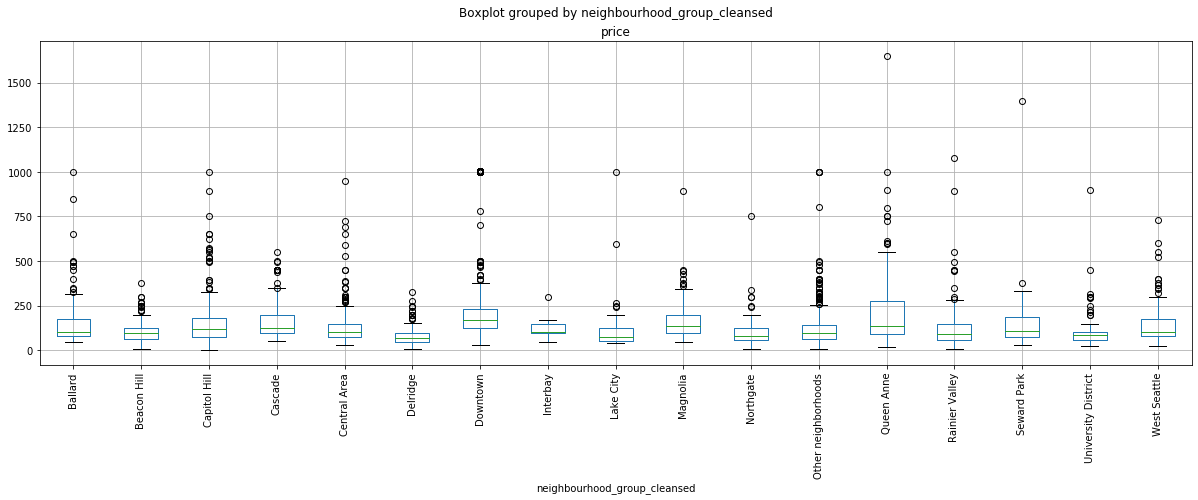

In [31]:
dataset.boxplot(column = "price",by = 'neighbourhood_group_cleansed', figsize = (20,6), rot = 90);

In [17]:
nh_price=dataset.groupby("neighbourhood_group_cleansed")["price"].mean()
nh_price

neighbourhood_group_cleansed
Ballard                149.215789
Beacon Hill            108.546099
Capitol Hill           145.865140
Cascade                172.513889
Central Area           137.582192
Delridge                87.936842
Downtown               244.476994
Interbay               127.222222
Lake City              116.236364
Magnolia               176.720588
Northgate              105.049383
Other neighborhoods    122.118859
Queen Anne             203.261411
Rainier Valley         127.737179
Seward Park            171.815789
University District    109.724490
West Seattle           143.752747
Name: price, dtype: float64

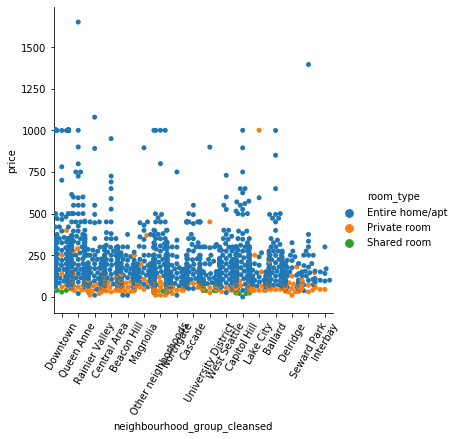

In [32]:
### Lets see the distributuion of price and neighbourhood group cleansed.
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plott=sns.catplot(x="neighbourhood_group_cleansed",y="price",hue="room_type", kind="swarm", data=dataset)
plt.xticks(rotation=60)
plott
#we can observe that in the region of downtown there are more entire home or aparment taken

In [33]:
#Lets look at room_type variable
dataset['room_type'].value_counts()
#large number of apartments observed

Entire home/apt    2648
Private room        740
Shared room          78
Name: room_type, dtype: int64

In [34]:
# Average price per room_type
rt_price = dataset.groupby("room_type")["price"].mean()
rt_price

room_type
Entire home/apt    186.952039
Private room        71.320270
Shared room         43.628205
Name: price, dtype: float64

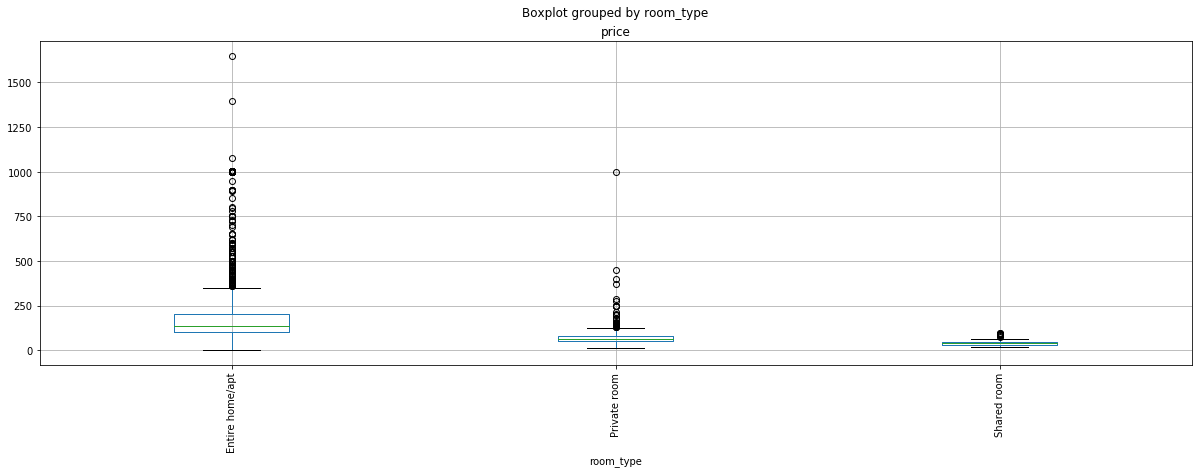

In [35]:
dataset.boxplot(column = "price",by = 'room_type', figsize = (20,6), rot = 90);

In [36]:
# Average price depending on the number of guests
gt_price= dataset.groupby("guests_included")["price"].mean()
gt_price

guests_included
1     132.585436
2     132.719807
3     149.685393
4     229.766355
5     242.942857
6     314.944444
7     336.785714
8     402.146341
9     369.800000
10    460.375000
11    375.000000
12    385.777778
13    495.000000
14    517.800000
15    950.000000
16    727.250000
Name: price, dtype: float64

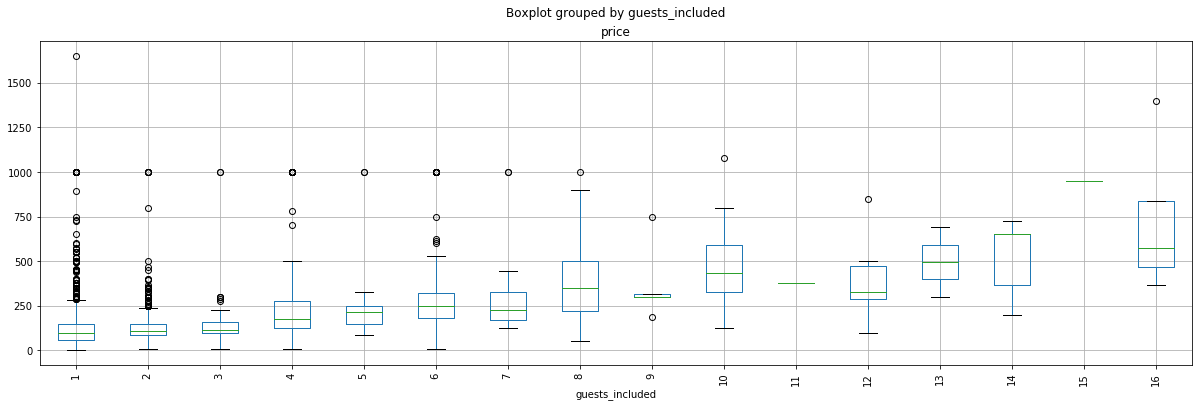

In [39]:
dataset.boxplot(column = "price",by = 'guests_included', figsize = (20,6), rot = 90);

In [37]:
# average price based on the property type
pt_price=dataset.groupby("property_type")["price"].mean()
pt_price=pt_price.sort_values(ascending=False)
pt_price

property_type
Boutique hotel        399.000000
Villa                 298.000000
Apartment             189.036269
Boat                  188.444444
Serviced apartment    170.528090
Loft                  161.041667
Cottage               159.611111
Condominium           157.051813
House                 156.468953
Houseboat             154.428571
Townhouse             147.856164
Cabin                 144.250000
Other                 131.857143
Bungalow              131.600000
Camper/RV             121.444444
Resort                109.000000
Guesthouse            106.761905
Guest suite           106.271137
Tiny house            105.416667
Yurt                  100.000000
Bed and breakfast      96.500000
In-law                 75.000000
Tent                   63.000000
Aparthotel             59.000000
Hostel                 49.500000
Farm stay              35.000000
Name: price, dtype: float64

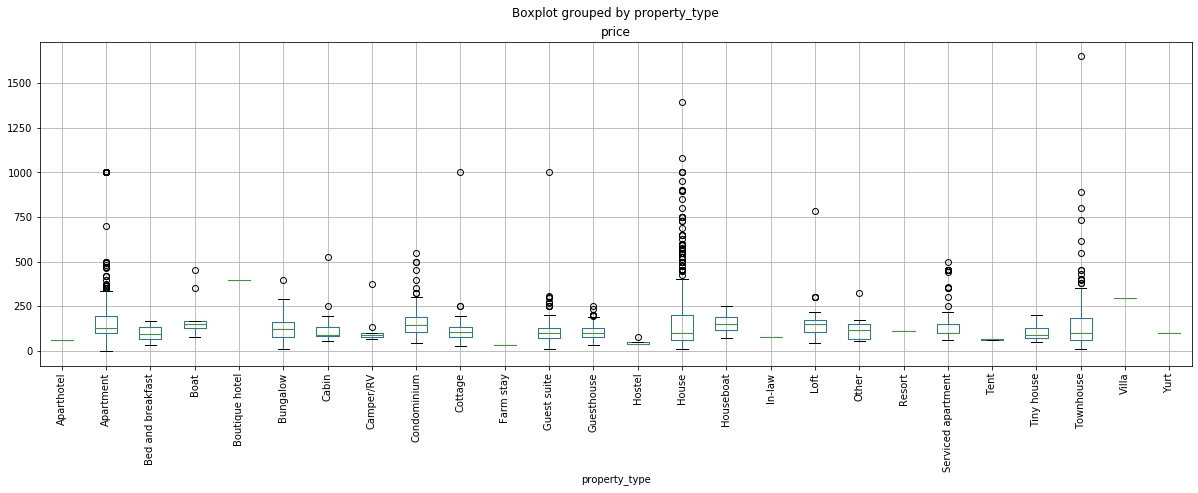

In [38]:
dataset.boxplot(column = "price",by = 'property_type', figsize = (20,6), rot = 90);

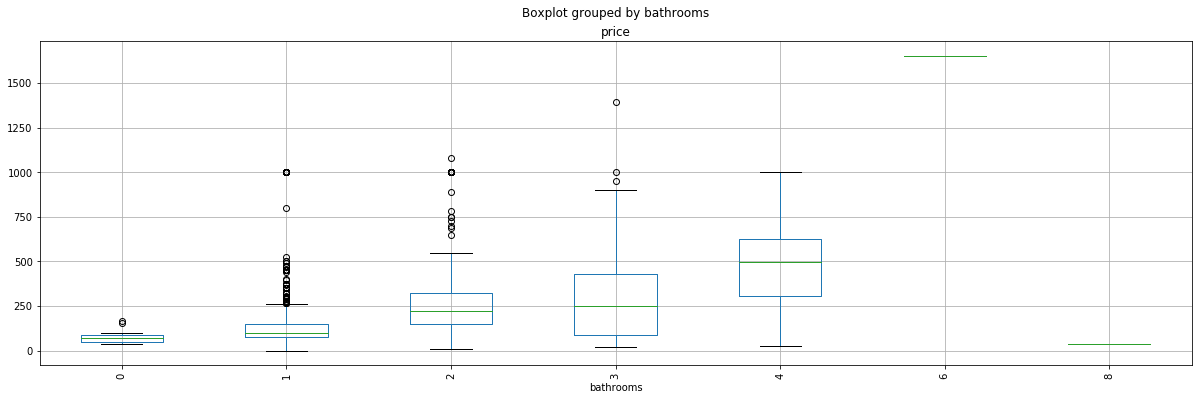

In [40]:
dataset.boxplot(column = "price",by = 'bathrooms', figsize = (20,6), rot = 90);

Index(['accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'guests_included', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'cleaning_fee', 'minimum_nights',
       'maximum_nights', 'instant_bookable', 'price'],
      dtype='object')

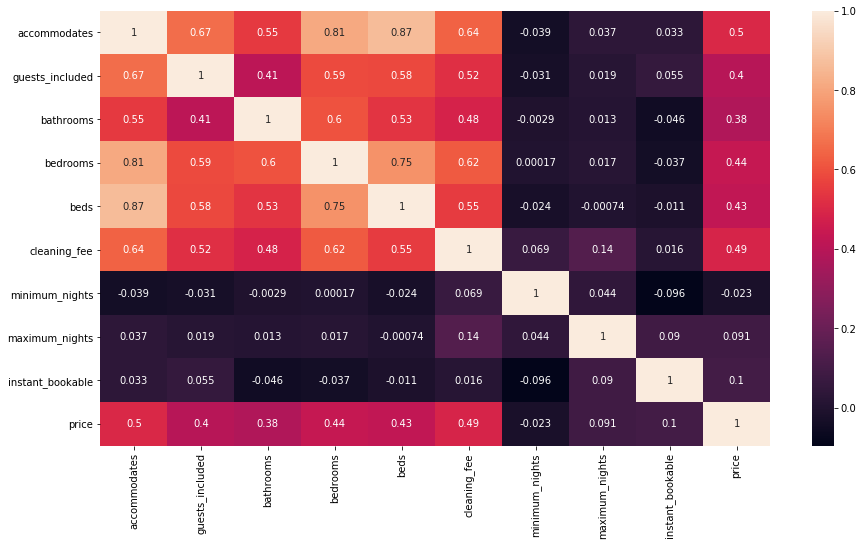

In [41]:
#Plotting correlation matrix for training set
corr = dataset.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
dataset.columns

performing the label encoding

In [42]:
#applying label encoding on training set
from sklearn.preprocessing import LabelEncoder
dataset['property_type']=LabelEncoder().fit_transform(dataset['property_type'])
dataset['instant_bookable']=LabelEncoder().fit_transform(dataset['instant_bookable'])
dataset['amenities']=LabelEncoder().fit_transform(dataset['amenities'])
dataset['bed_type']=LabelEncoder().fit_transform(dataset['bed_type'])
dataset

,accommodates,neighbourhood_group_cleansed,property_type,room_type,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,price
0,5,Downtown,1,Entire home/apt,4,2,2,2,3,1391,129,2,1125,1,279.0
1,2,Queen Anne,14,Entire home/apt,1,1,0,1,3,324,50,2,30,1,99.0
2,4,Rainier Valley,11,Entire home/apt,2,1,1,2,3,1604,25,2,28,0,75.0
3,2,Central Area,14,Private room,1,1,1,1,3,127,0,2,30,0,70.0
4,8,Beacon Hill,14,Entire home/apt,6,2,3,3,3,2076,99,2,12,0,242.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,5,Downtown,1,Entire home/apt,4,1,2,2,3,1138,129,2,1125,1,350.0
3462,1,Capitol Hill,14,Shared room,1,1,1,1,3,3041,15,1,21,1,30.0
3463,2,Other neighborhoods,14,Private room,1,2,1,1,3,2825,22,2,30,1,30.0
3464,2,Other neighborhoods,11,Entire home/apt,1,1,1,1,3,1766,25,1,1125,0,95.0


In [43]:
dataset_onehot_train= pd.get_dummies(dataset, columns=["neighbourhood_group_cleansed","room_type"], prefix = ["nh","rt"],drop_first=True)

In [44]:
dataset_onehot_train

,accommodates,property_type,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,...,nh_Magnolia,nh_Northgate,nh_Other neighborhoods,nh_Queen Anne,nh_Rainier Valley,nh_Seward Park,nh_University District,nh_West Seattle,rt_Private room,rt_Shared room
0,5,1,4,2,2,2,3,1391,129,2,...,0,0,0,0,0,0,0,0,0,0
1,2,14,1,1,0,1,3,324,50,2,...,0,0,0,1,0,0,0,0,0,0
2,4,11,2,1,1,2,3,1604,25,2,...,0,0,0,0,1,0,0,0,0,0
3,2,14,1,1,1,1,3,127,0,2,...,0,0,0,0,0,0,0,0,1,0
4,8,14,6,2,3,3,3,2076,99,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,5,1,4,1,2,2,3,1138,129,2,...,0,0,0,0,0,0,0,0,0,0
3462,1,14,1,1,1,1,3,3041,15,1,...,0,0,0,0,0,0,0,0,0,1
3463,2,14,1,2,1,1,3,2825,22,2,...,0,0,1,0,0,0,0,0,1,0
3464,2,11,1,1,1,1,3,1766,25,1,...,0,0,1,0,0,0,0,0,0,0


## Model Buiding

In [46]:
# Lets select data
X= dataset_onehot_train.loc[:,dataset_onehot_train.columns!='price' ]
y= dataset_onehot_train['price']

In [47]:
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

### 1. Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True,n_jobs=5)
regressor.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=5, normalize=False)

In [50]:
y_pred=regressor.predict(X_test)

In [52]:
y_pred

array([276.42866659, 311.45676876, 108.63874407, 268.03545926,
       124.22340637, 253.9193344 ,  90.89068702, 194.65729717,
       138.86633551, 240.67720346,  66.57886885, 127.53111996,
        54.98416474, 214.18908759, 198.71269477,  63.78714875,
        62.55877835, 141.21701365,  42.58406166, 140.38227266,
       126.8474652 , 183.50556896, 205.25988993, 373.65567498,
       240.67720346,  94.78314699, 314.2375731 , 115.7227108 ,
       261.17989017,  91.1702059 , 106.2166293 , 301.26657854,
       240.67720346, 158.57988235, 111.3291165 , 132.02259327,
       100.62056024, 117.69935732, 184.9173668 ,  98.33442989,
       372.36459972, 204.30354828,  46.81008238,  69.72303987,
        92.58211887, 263.83544976,  48.33871792, 129.70792258,
       167.78923987, 116.06237352, 194.32853527, 111.85762013,
        86.35453707,  92.14179892, 358.60277225,  67.60864215,
       186.32755221,  41.12283002, 200.97094216,  88.61625874,
        74.12150656, 140.51887791, 133.48887971,  63.37

In [53]:
y_pred.shape

(694,)

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print(regressor.score(X_train, y_train))
MSE = mean_squared_error(y_test, y_pred)
print(MSE)
rmse=MSE**(0.5)
print(rmse)

0.4145553858816372
16017.962666968782
126.56209016513904


**Even after tuning the hyperparameters also we dont observe any change. Hence we will try to use another algorithm.**

## 2. Random Forest Regression

In [56]:
#fitting the data
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
# n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [58]:
y_pred=regressor.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print(regressor.score(X_train, y_train))
MSE = mean_squared_error(y_test, y_pred)
print(MSE)
rmse=MSE**(0.5)
print(rmse)

0.9539643593690312
7749.409305348445
88.03072932418796


Now lets see the results after tuning the hyperparameters

In [60]:
#fitting the data
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=1000 ,max_depth = 50, min_samples_split = 5,min_samples_leaf =4,n_jobs=1,verbose=2)
regressor.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tre

building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tre

building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tree 999 of 1000
building tree 1000 of 1000


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   18.0s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=1, oob_score=False,
                      random_state=None, verbose=2, warm_start=False)

In [61]:
y_pred=regressor.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print(regressor.score(X_train, y_train))
MSE = mean_squared_error(y_test, y_pred)
print(MSE)
rmse=MSE**(0.5)
print(rmse)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.8289238865170345
8142.460890478096
90.23558549972454


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished


**We can see that random forrest giving us good accuracy, still we will try to use another algorithm and try to get more accuracy**

## XG-BOOST REGRESSOR

In [62]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train,y_train)
# #(learning_rate =0.1,
#               n_estimators=200,
#               max_depth=5,
#               min_child_weight=2,
#               gamma=0.1,
#               subsample=0.85,
#               colsample_bytree=0.8,
#               objective= 'reg:linear',random_state=42,
#               nthread=4,
#               scale_pos_weight=1,
#               seed=27,verbosity=1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [63]:
y_pred=regressor.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print(regressor.score(X_train, y_train))
MSE = mean_squared_error(y_test, y_pred)
print(MSE)
rmse=MSE**(0.5)
print(rmse)

0.977806149588945
9089.992339923509
95.34145132062712


**lets try tuning the hyperparameters**

In [65]:
#fitting the data
from xgboost import XGBRegressor
regressor1 = XGBRegressor(learning_rate =0.1,
              n_estimators=200,
              max_depth=5,
              min_child_weight=2,
              gamma=0.1,
              subsample=0.85,
              colsample_bytree=0.8,
              objective= 'reg:linear',random_state=42,
              nthread=4,
              scale_pos_weight=1,
              seed=27,verbosity=1)#tuning the parameters
regressor1.fit(X, y)

[11:41:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=27, subsample=0.85, tree_method='exact',
             validate_parameters=1, verbosity=1)

In [66]:
y_pred=regressor1.predict(X_test)

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print(regressor1.score(X_train, y_train))
MSE = mean_squared_error(y_test, y_pred)
print(MSE)
rmse=MSE**(0.5)
print(rmse)

0.9244565948788287
1568.767433519221
39.60766887257089


**After tunning the hyper paramets we can see change and good accuracy. And let us try to test our data on Xgboost algorithm**

## Preprocess the tesst data`

In [68]:
#applying it on the testing set
dataset_1['cleaning_fee'] = dataset_1['cleaning_fee'].str.replace('$', '')
dataset_1['bathrooms'] = dataset_1['bathrooms'].astype(int)
dataset_1['cleaning_fee']=dataset_1['cleaning_fee'].astype(float)
dataset_1['cleaning_fee'] = dataset_1['cleaning_fee'].astype(int)

In [69]:
dataset_1['neighbourhood_group_cleansed'].value_counts()

Downtown               321
Other neighborhoods    305
Capitol Hill           206
Central Area           141
Queen Anne             108
West Seattle           101
Ballard                 88
Rainier Valley          86
Cascade                 83
Beacon Hill             74
Delridge                59
University District     52
Northgate               38
Magnolia                29
Lake City               27
Seward Park             15
Interbay                 1
Name: neighbourhood_group_cleansed, dtype: int64

In [70]:
#applying encoding on test data
from sklearn.preprocessing import LabelEncoder
dataset_1['property_type']=LabelEncoder().fit_transform(dataset_1['property_type'])
dataset_1['instant_bookable']=LabelEncoder().fit_transform(dataset_1['instant_bookable'])
dataset_1['amenities']=LabelEncoder().fit_transform(dataset_1['amenities'])
dataset_1['bed_type']=LabelEncoder().fit_transform(dataset_1['bed_type'])
dataset_1

,accommodates,neighbourhood_group_cleansed,property_type,room_type,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable
0,4,Beacon Hill,9,Entire home/apt,2,1,2,2,4,689,85,3,300,1
1,4,Lake City,9,Entire home/apt,1,1,1,2,4,936,40,2,1125,1
2,2,Northgate,1,Entire home/apt,1,1,1,1,4,1460,150,5,120,0
3,2,Downtown,1,Entire home/apt,1,1,1,1,4,883,75,1,30,0
4,2,Other neighborhoods,11,Private room,1,1,1,1,4,569,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,3,University District,1,Entire home/apt,1,1,1,1,4,1044,60,2,1125,0
1730,4,West Seattle,1,Entire home/apt,1,1,2,2,4,191,50,2,29,1
1731,2,Other neighborhoods,11,Private room,1,1,1,1,4,616,25,1,29,0
1732,4,Central Area,9,Entire home/apt,2,1,1,2,4,1434,75,3,1125,1


Index(['accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'guests_included', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'cleaning_fee', 'minimum_nights',
       'maximum_nights', 'instant_bookable'],
      dtype='object')

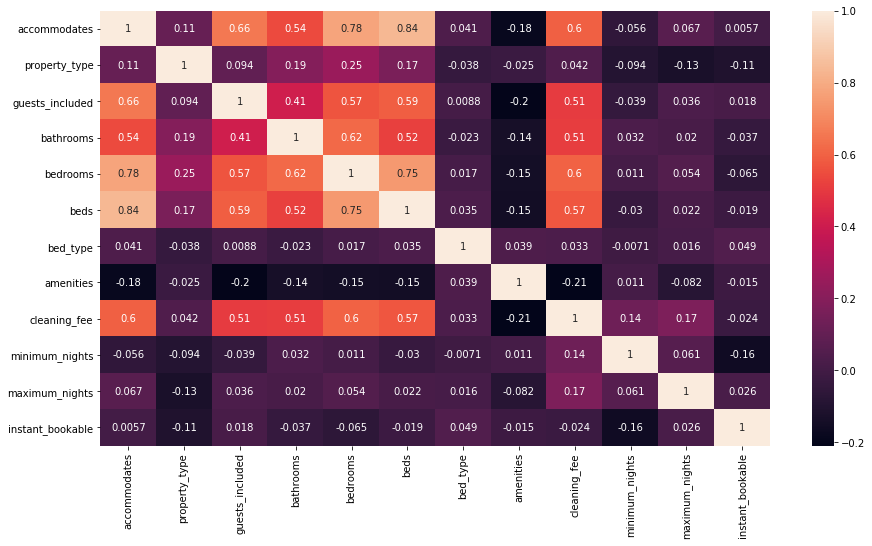

In [71]:
#Plotting correlation matrix on the test set
import seaborn as sns
corr = dataset_1.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
dataset_1.columns

performing the one hot encoding

In [72]:
dataset_onehot_test = pd.get_dummies(dataset_1, columns=["neighbourhood_group_cleansed","room_type"], prefix = ["nh","rt"],drop_first=True)

In [73]:
dataset_onehot_test

,accommodates,property_type,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,...,nh_Magnolia,nh_Northgate,nh_Other neighborhoods,nh_Queen Anne,nh_Rainier Valley,nh_Seward Park,nh_University District,nh_West Seattle,rt_Private room,rt_Shared room
0,4,9,2,1,2,2,4,689,85,3,...,0,0,0,0,0,0,0,0,0,0
1,4,9,1,1,1,2,4,936,40,2,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,1,1,4,1460,150,5,...,0,1,0,0,0,0,0,0,0,0
3,2,1,1,1,1,1,4,883,75,1,...,0,0,0,0,0,0,0,0,0,0
4,2,11,1,1,1,1,4,569,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,3,1,1,1,1,1,4,1044,60,2,...,0,0,0,0,0,0,1,0,0,0
1730,4,1,1,1,2,2,4,191,50,2,...,0,0,0,0,0,0,0,1,0,0
1731,2,11,1,1,1,1,4,616,25,1,...,0,0,1,0,0,0,0,0,1,0
1732,4,9,2,1,1,2,4,1434,75,3,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X_t=dataset_onehot_test.loc[:,:]

In [75]:
y_pred_test=regressor1.predict(X_t)

In [76]:
y_pred_test.shape

(1734,)

In [77]:
y_pred_train=regressor1.predict(X)

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print(regressor1.score(X, y))
MSE = mean_squared_error(y, y_pred_train)
print(MSE)
rmse=MSE**(0.5)
print(rmse)

0.9272283454025567
1833.1019750418275
42.81474016085847


Adding the y_pred column to the test dataset

In [79]:
y_pred=y_pred_test.astype(str)
dataset_1['price']=y_pred
dataset_1

,accommodates,neighbourhood_group_cleansed,property_type,room_type,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,price
0,4,Beacon Hill,9,Entire home/apt,2,1,2,2,4,689,85,3,300,1,134.5403
1,4,Lake City,9,Entire home/apt,1,1,1,2,4,936,40,2,1125,1,126.238686
2,2,Northgate,1,Entire home/apt,1,1,1,1,4,1460,150,5,120,0,179.07257
3,2,Downtown,1,Entire home/apt,1,1,1,1,4,883,75,1,30,0,155.44864
4,2,Other neighborhoods,11,Private room,1,1,1,1,4,569,0,1,3,0,55.337162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,3,University District,1,Entire home/apt,1,1,1,1,4,1044,60,2,1125,0,121.02654
1730,4,West Seattle,1,Entire home/apt,1,1,2,2,4,191,50,2,29,1,122.93544
1731,2,Other neighborhoods,11,Private room,1,1,1,1,4,616,25,1,29,0,74.69835
1732,4,Central Area,9,Entire home/apt,2,1,1,2,4,1434,75,3,1125,1,125.12058


In [80]:
dataset_1.to_csv('final_airbnb.csv',index=False) 


Hence we get enough good accuracy on Xgboost algorithm and hence this was the end of the project

# Thank you!